# Lab Assignment - 3

### Ex No.3 - CNN for MNIST digit Classification
### Date - 10/02/2025
### CS22B1093 Rohan G


----------

### Q1) Classify MNIST digits using CNN.

Dataset : download from keras/pytorch/standard source.

1. Plot few samples from dataset
2. Train the network 
3. Test on the test dataset
4. Calculate test accuracy on test set

#### Importing Necessary Libraries

In [3]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

#### Loading and Preprocessing data

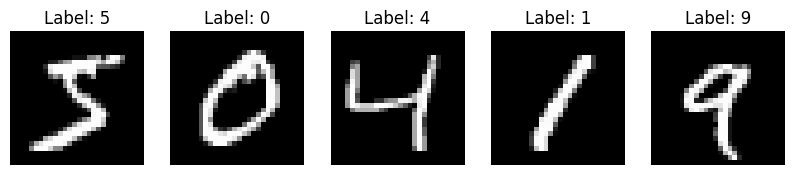

In [4]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalize images
x_train, x_test = x_train / 255.0, x_test / 255.0

# Plot few samples
fig, axes = plt.subplots(1, 5, figsize=(10, 5))
for i, ax in enumerate(axes):
    ax.imshow(x_train[i], cmap='gray')
    ax.set_title(f"Label: {y_train[i]}")
    ax.axis('off')
plt.show()

#### ANN Model Building and Training

In [5]:
ann_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

ann_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [6]:
# Print ANN Model Summary
print("\nFully Connected ANN Model Architecture:")
ann_model.summary()


Fully Connected ANN Model Architecture:


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# Train ANN Model
ann_model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Evaluate ANN Model
ann_test_loss, ann_test_acc = ann_model.evaluate(x_test, y_test)
print(f"ANN Test Accuracy: {ann_test_acc:.4f}")

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8760 - loss: 0.4224 - val_accuracy: 0.9630 - val_loss: 0.1229
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9681 - loss: 0.1070 - val_accuracy: 0.9726 - val_loss: 0.0840
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9786 - loss: 0.0694 - val_accuracy: 0.9727 - val_loss: 0.0924
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9832 - loss: 0.0539 - val_accuracy: 0.9697 - val_loss: 0.1009
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9870 - loss: 0.0406 - val_accuracy: 0.9752 - val_loss: 0.0888
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9884 - loss: 0.0338 - val_accuracy: 0.9760 - val_loss: 0.0863
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9921 - loss: 0.0249 - val_accuracy: 0.9753 - val_loss: 0.0910
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9926 - loss: 0.0226 - 

#### CNN Model Building and Training

In [8]:
cnn_model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [9]:
# Print CNN Model Summary
print("\nConvolutional Neural Network Model Architecture:")
cnn_model.summary()


Convolutional Neural Network Model Architecture:


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# Reshape data for CNN
x_train_cnn = x_train.reshape(-1, 28, 28, 1)
x_test_cnn = x_test.reshape(-1, 28, 28, 1)

# Train CNN Model
cnn_model.fit(x_train_cnn, y_train, epochs=10, validation_data=(x_test_cnn, y_test))

# Evaluate CNN Model
cnn_test_loss, cnn_test_acc = cnn_model.evaluate(x_test_cnn, y_test)
print(f"CNN Test Accuracy: {cnn_test_acc:.4f}")

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9094 - loss: 0.3019 - val_accuracy: 0.9862 - val_loss: 0.0444
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9864 - loss: 0.0459 - val_accuracy: 0.9865 - val_loss: 0.0405
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9910 - loss: 0.0272 - val_accuracy: 0.9904 - val_loss: 0.0302
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9932 - loss: 0.0209 - val_accuracy: 0.9915 - val_loss: 0.0270
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9958 - loss: 0.0135 - val_accuracy: 0.9890 - val_loss: 0.0349
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9965 - loss: 0.0109 - val_accuracy: 0.9897 - val_loss: 0.0352
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9976 - loss: 0.0072 - val_accuracy: 0.9915 - val_loss: 0.0307
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9968 - loss: 0.0085 - 

#### Comparing the Models

In [11]:
print("\nComparison:")
print(f"ANN Parameters: {ann_model.count_params()}")
print(f"CNN Parameters: {cnn_model.count_params()}")
print(f"ANN Test Accuracy: {ann_test_acc:.4f}")
print(f"CNN Test Accuracy: {cnn_test_acc:.4f}")


Comparison:
ANN Parameters: 109386
CNN Parameters: 225034
ANN Test Accuracy: 0.9777
CNN Test Accuracy: 0.9927


----------------------